In [1]:
from python_client import PyPoulpeRemoteClient

slave_id = 0
n_axis = 3 # 2 or 3

# Create an instance of the client
client = PyPoulpeRemoteClient("http://127.0.0.1:50098", [slave_id], 0.001)

print(client.get_connected_devices())

# Use client methods
client.turn_on(slave_id)
client.set_torque_limit(slave_id,[0.3]*n_axis)
client.set_velocity_limit(slave_id, [0.3]*n_axis)

thread '<unnamed>' panicked at python_client/src/lib.rs:32:23:
Failed to connect to the server: Error in connecting to the server! Check if server is up!!!
note: run with `RUST_BACKTRACE=1` environment variable to display a backtrace


PanicException: Failed to connect to the server: Error in connecting to the server! Check if server is up!!!

In [5]:
client.set_torque_limit(slave_id,[0.3]*n_axis)
client.set_velocity_limit(slave_id, [0.3]*n_axis)
client.set_target_position(slave_id,[0]*n_axis)

In [ ]:
import numpy as np
import time


client.set_torque_limit(slave_id,[1.0]*n_axis)
client.set_velocity_limit(slave_id, [1.0]*n_axis)

t0 = time.time()
stop = False
tar, t=[],[]
pos, vel, torque, axis_sensors = [], [], [], []
target = 0
while time.time() - t0 < 30 and target < 5.33*2*np.pi:
    target = target+0.004
    client.set_target_position(slave_id,[target]*n_axis)
    time.sleep(0.001)
    t.append(time.time()-t0)
    tar.append(client.get_target_position(slave_id))
    pos.append(client.get_position_actual_value(slave_id))
    vel.append(client.get_velocity_actual_value(slave_id))
    torque.append(client.get_torque_actual_value(slave_id))
    axis_sensors.append(client.get_axis_sensors(slave_id))
        
tar = np.array(tar)
vel = np.array(vel)
pos = np.array(pos)
torque = np.array(torque)
axis_sensors = np.array(axis_sensors)
client.set_torque_limit(slave_id,[0.3]*n_axis)
client.set_velocity_limit(slave_id, [0.3]*n_axis)
client.set_target_position(slave_id,[0]*n_axis)

thread 'tokio-runtime-worker' panicked at poulpe_ethercat_grpc/src/client.rs:135:81:
called `Result::unwrap()` on an `Err` value: Status { code: Unknown, message: "h2 protocol error: error reading a body from connection: stream closed because of a broken pipe", source: Some(hyper::Error(Body, Error { kind: Io(Custom { kind: BrokenPipe, error: "stream closed because of a broken pipe" }) })) }


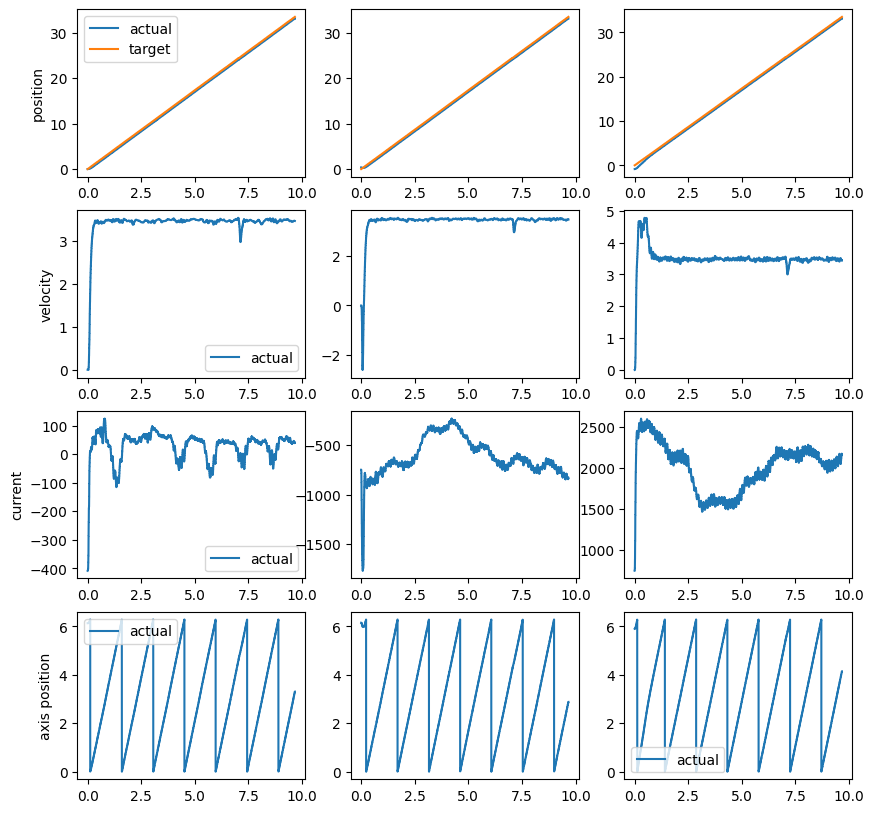

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axs = plt.subplots(4,n_axis, figsize=(10,10))

for i, a in enumerate(axs.T):
    a[0].step(t,pos[:,i], label="actual")
    a[0].step(t,tar[:,i], label="target")    
    a[1].step(t,vel[:,i], label = "actual")
    a[2].step(t,torque[:,i], label = "actual")
    a[3].step(t, axis_sensors[:,i], label = "actual")

for i, a in enumerate(axs[:].T):
    a[0].set_ylabel("position")
    a[0].legend()
    a[1].set_ylabel("velocity")
    a[1].legend()
    a[2].set_ylabel("current")
    a[2].legend()
    a[3].set_ylabel("axis position")
    a[3].legend()
    break

plt.legend()

loop times 
mean 1.154441128378557 ms, 
max: 5.296468734741211 ms, 
min 1.043081283569336 ms


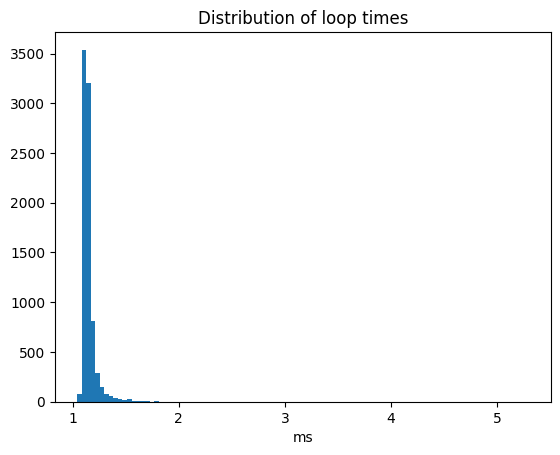

thread 'tokio-runtime-worker' panicked at poulpe_ethercat_grpc/src/client.rs:135:81:
called `Result::unwrap()` on an `Err` value: Status { code: Unknown, message: "h2 protocol error: error reading a body from connection: stream closed because of a broken pipe", source: Some(hyper::Error(Body, Error { kind: Io(Custom { kind: BrokenPipe, error: "stream closed because of a broken pipe" }) })) }
note: run with `RUST_BACKTRACE=1` environment variable to display a backtrace


In [5]:
dt = np.diff(t)*1000
plt.figure()
plt.hist(dt,100);
plt.xlabel("ms")
plt.title("Distribution of loop times")
print(f"loop times \nmean {dt.mean()} ms, \nmax: {dt.max()} ms, \nmin {dt.min()} ms")

In [42]:
client.get_board_temperatures(slave_id), client.get_motor_temperatures(slave_id)

([43.16276550292969, 43.22650909423828, 43.124656677246094],
 [26.0400390625, 26.0400390625, 26.0400390625])